In [1]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_digits
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelBinarizer

C:\David\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
C:\David\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# load data
digits = load_digits()
data = digits.data.astype('float32')
target = digits.target
# one-hot encoding
target = LabelBinarizer().fit_transform(target).astype('float32')

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.3)

In [3]:
# define the NN layer
def add_layer(inputs, n_features, n_units, layer_name = None,activation = None):
    W = tf.Variable(tf.random_normal([n_features, n_units]))
    bias = tf.Variable(tf.zeros([1,n_units]) + 0.1)
    Wx_plus_bias = tf.add(tf.matmul(inputs,W),bias)
    Wx_plus_bias = tf.nn.dropout(Wx_plus_bias, keep_prob) # to avoid overfitting
    if activation == None:
        output = Wx_plus_bias
    else:
        output = activation(Wx_plus_bias)
    tf.summary.histogram(layer_name, output)
    return output

In [4]:
# build the NN structure
xs = tf.placeholder(tf.float32, [None, 64])
ys = tf.placeholder(tf.float32,[None,10])
keep_prob = tf.placeholder(tf.float32) # this defines the portion of weights dropped out


hidden =add_layer(xs, 64, 50,layer_name = 'l1' ,activation= tf.nn.tanh)
output = add_layer(hidden, 50, 10, layer_name='l2', activation=tf.nn.softmax)

cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys*tf.log(output)))
tf.summary.scalar('loss', cross_entropy)

train = tf.train.GradientDescentOptimizer(0.0005).minimize(cross_entropy)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

merge = tf.summary.merge_all()
train_writer = tf.summary.FileWriter('./log_tb_digits/train/', sess.graph)
test_writer = tf.summary.FileWriter('./log_tb_digits/test/', sess.graph)

for i in range(2000):
    sess.run(train, feed_dict = {xs:X_train, ys:y_train, keep_prob : 0.5})
    if i % 50 == 0:
        train_result = sess.run(merge, feed_dict = {xs:X_train, ys:y_train, keep_prob : 1})
        test_result = sess.run(merge, feed_dict = {xs:X_test, ys:y_test, keep_prob : 1})
        train_writer.add_summary(train_result, i)
        test_writer.add_summary(test_result, i)

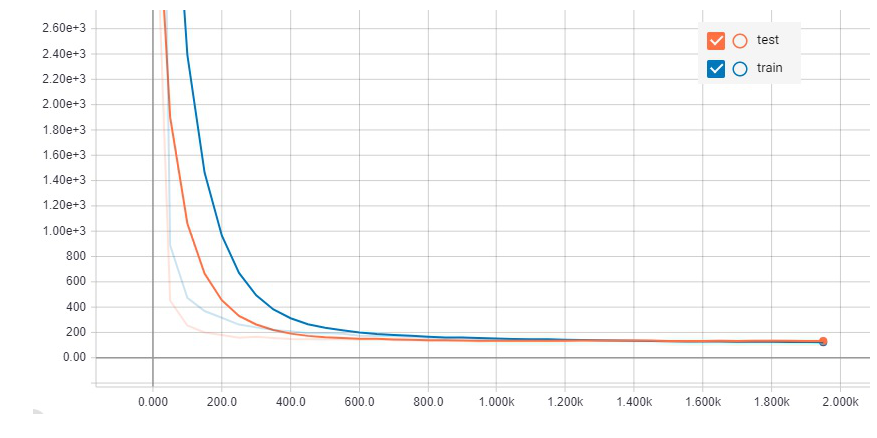

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1)
fig.set_figwidth(15), fig.set_figheight(10)
img = plt.imread('./log_tb_digits/result.JPG')
ax.imshow(img)
ax.axis('off')

plt.show()